In [2]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [3]:
# Step 2: Load Dataset
df = pd.read_csv("Diabetes_Data.csv")
print("First 5 rows:")
print(df.head())

First 5 rows:
   Patient_ID  Glucose  BloodPressure  Insulin   BMI  Age  Outcome
0           1       85             66       94  26.6   31        0
1           2       89             66       94  28.1   33        0
2           3       78             50       88  31.0   26        1
3           4      115             70       96  34.6   29        0
4           5      120             74      100  30.5   35        1


In [4]:
# Step 3: Preprocessing
df = df.drop("Patient_ID", axis=1)  # Remove ID column

# Features and Target
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Step 4: Split Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [6]:
# Step 5: Train KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Step 6: Evaluate Model
y_pred = knn.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.86      0.92         7

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

Accuracy: 0.9333333333333333


In [7]:
# Step 6: Evaluate Model
y_pred = knn.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.86      0.92         7

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

Accuracy: 0.9333333333333333


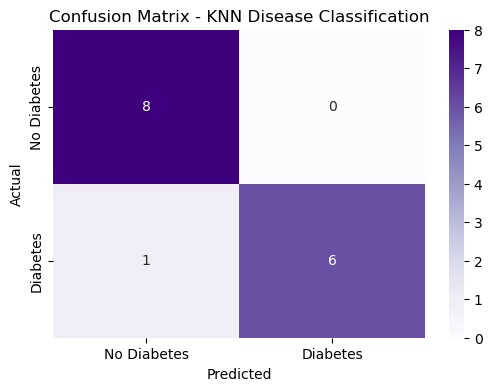

In [8]:
# Step 7: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN Disease Classification")
plt.show()

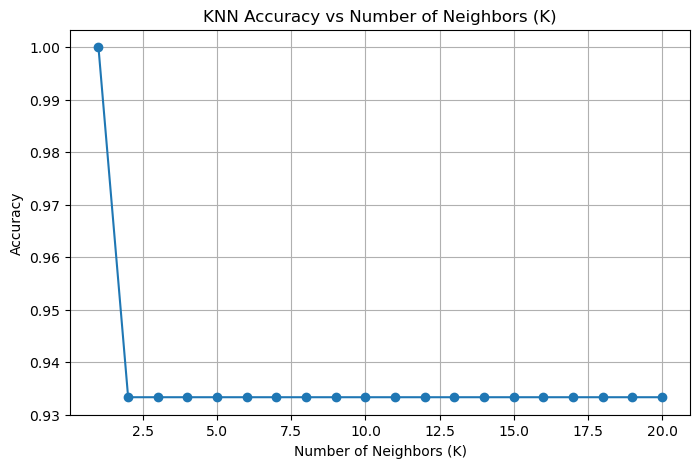

In [9]:
# Step 8: Accuracy vs K Plot
accuracy_scores = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(8,5))
plt.plot(range(1,21), accuracy_scores, marker='o')
plt.title("KNN Accuracy vs Number of Neighbors (K)")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()